# Common Challenges in Machine Learning

Machine learning can be powerful, but it comes with various challenges that can impact the effectiveness of models. In this section, we will discuss some of the most common challenges faced in machine learning, along with solutions and best practices.

---

## Table of Contents

1. [Challenge 1: Overfitting and Underfitting](#1-overfitting-underfitting)
2. [Challenge 2: Data Imbalance](#2-data-imbalance)
3. [Challenge 3: Feature Selection](#3-feature-selection)
4. [Challenge 4: Data Quality Issues](#4-data-quality)
5. [Challenge 5: Interpretability of Models](#5-interpretability-of-models)
6. [Challenge 6: Model Deployment and Scalability](#6-model-deployment)

---

## 1. Overfitting and Underfitting

### **Overfitting**
Overfitting occurs when a model learns the noise in the training data rather than the underlying patterns. This results in high accuracy on the training set but poor generalization to unseen data.

### **Underfitting**
Underfitting occurs when a model is too simple to capture the underlying patterns in the data, resulting in both high training and test errors.


In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
X = np.random.rand(100,1)*10
y = np.sin(X).ravel() + np.random.normal(0,.5,X.shape[0])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

# Overfitting: Use a very complex model
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

test_error = mean_squared_error(y_test,y_pred)
print(f"Test MSE: {test_error:.4f}")

Test MSE: 0.5887


Solutions:
- Use cross-validation to monitor performance on unseen data.
- Apply regularization techniques like Ridge or Lasso to prevent overfitting.
- Increase model complexity for underfitting.

## 2. Data Imbalance
### Problem
Data imbalance occurs when one class significantly outnumbers others, leading to biased models that favor the majority class.

### Solutions:
- Resampling: Oversample the minority class or undersample the majority class.
- Class Weights: Adjust class weights to penalize misclassification of the minority class.
- Synthetic Data Generation: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique).

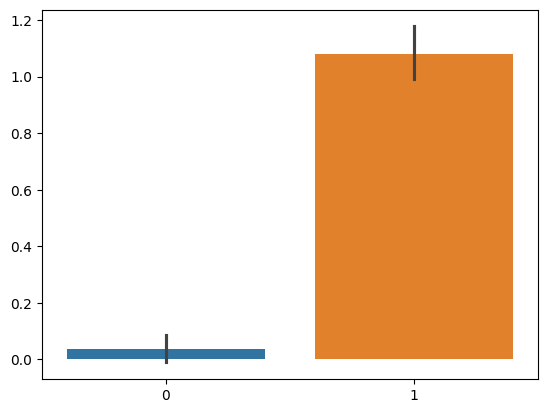

In [9]:
from sklearn.utils import resample
import pandas as pd

data = pd.read_csv("data_imbalance.csv")

X = data.drop(columns=["Target"])
y = data["Target"]

majority_class = X[y == 0]
minority_class = X[y == 1]


min_upsampled = resample(minority_class,
                         replace=True,
                         n_samples=len(majority_class),
                         random_state=42)

balanced_data = np.vstack((majority_class, min_upsampled))

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(balanced_data)
plt.show()

## 3. Feature Selection
### Problem
- Having too many irrelevant or redundant features can lead to overfitting, while too few features can result in underfitting. Choosing the right features is critical for building effective models.

### Solutions:
- Use algorithms like Recursive Feature Elimination (RFE) or Lasso to select important features.
- Use PCA (Principal Component Analysis) or LDA (Linear Discriminant Analysis) for dimensionality reduction.

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
print("Selected features:", rfe.support_)

Selected features: [ True  True]


## 4. Data Quality Issues
### Problem
- Dirty data—such as missing values, outliers, and noise—can negatively impact model performance.

### Solutions:
- Handle missing data: Use techniques like mean/mode imputation, forward/backward filling, or remove missing entries.
- Handle outliers: Use robust statistical methods or simply remove extreme outliers.
- Noise reduction: Use smoothing techniques like moving averages for time-series data or filtering.

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

## 5. Interpretability of Models
### Problem
- While complex models like neural networks and ensemble methods provide high accuracy, they often lack interpretability, making it hard to understand why decisions are made.

### Solutions:
- Use simpler, interpretable models when possible (e.g., decision trees).
- Apply techniques like LIME (Local Interpretable Model-agnostic Explanations) or SHAP (SHapley Additive exPlanations) to explain complex models.

In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## 6. Model Deployment and Scalability
### Problem
- Once a model is trained, deploying it into a production environment and ensuring it scales effectively can be challenging.

### Solutions:
- Use frameworks like TensorFlow Serving, Flask, or FastAPI to deploy models.
Ensure models are optimized for real-time predictions with efficient resource use.

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Receive input data
    prediction = model.predict([data['features']])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)